<a href="https://colab.research.google.com/github/jadhav-rakesh/NLP/blob/main/text_generation_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install --upgrade tensorflow

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import string
import numpy as np
import pandas as pd

In [4]:
!wget --no-check-certificate \
    https://drive.google.com/uc?id=1LiJFZd41ofrWoBtW-pMYsfz1w8Ny0Bj8 \
    -O /tmp/songdata.csv

--2025-02-08 10:58:32--  https://drive.google.com/uc?id=1LiJFZd41ofrWoBtW-pMYsfz1w8Ny0Bj8
Resolving drive.google.com (drive.google.com)... 74.125.195.100, 74.125.195.138, 74.125.195.139, ...
Connecting to drive.google.com (drive.google.com)|74.125.195.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1LiJFZd41ofrWoBtW-pMYsfz1w8Ny0Bj8 [following]
--2025-02-08 10:58:32--  https://drive.usercontent.google.com/download?id=1LiJFZd41ofrWoBtW-pMYsfz1w8Ny0Bj8
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.197.132, 2607:f8b0:400e:c01::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.197.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72436445 (69M) [application/octet-stream]
Saving to: ‘/tmp/songdata.csv’

/tmp/songdata.csv   100%[===================>]  69.08M  59.7MB/s    in 1.2s    

2025-02-08 10:58:38 (59.7 MB

In [5]:
def tokenize_corpus(corpus, num_words=-1):
    if num_words > -1:
        tokenizer = Tokenizer(num_words=num_words)
    else:
        tokenizer = Tokenizer()
    tokenizer.fit_on_texts(corpus)
    return tokenizer

def create_lyrics_corpus(dataset, field):
    dataset[field] = dataset[field].str.replace("[{}]".format(string.punctuation), "")
    dataset[field] = dataset[field].str.lower()
    lyrics = dataset[field].str.cat()
    corpus = lyrics.split("\n")
    for l in range(len(corpus)):
        corpus[l] = corpus[l].rstrip()
    corpus = [l for l in corpus if l != ""]
    return corpus

In [6]:
dataset = pd.read_csv('/tmp/songdata.csv', dtype=str)[:10]
corpus = create_lyrics_corpus(dataset, "text")
tokenizer = tokenize_corpus(corpus)
total_words = len(tokenizer.word_index) + 1
print(tokenizer.word_index)
print(total_words)

{'you': 1, 'a': 2, 'i': 3, 'and': 4, 'me': 5, 'the': 6, 'is': 7, 'my': 8, 'to': 9, 'be': 10, 'ma': 11, 'it': 12, 'of': 13, "i'm": 14, 'your': 15, 'love': 16, 'so': 17, 'as': 18, 'boomerang': 19, 'that': 20, 'in': 21, 'andante': 22, 'boom': 23, 'make': 24, 'dumb': 25, 'on': 26, 'oh': 27, 'dum': 28, 'for': 29, 'but': 30, 'new': 31, 'bang': 32, "it's": 33, 'like': 34, 'know': 35, 'now': 36, 'how': 37, 'could': 38, "you're": 39, 'sing': 40, 'never': 41, 'no': 42, 'hum': 43, 'chiquitita': 44, 'can': 45, 'we': 46, 'song': 47, 'had': 48, 'good': 49, "you'll": 50, 'she': 51, 'just': 52, 'girl': 53, 'again': 54, 'will': 55, 'take': 56, 'please': 57, 'let': 58, 'am': 59, 'eyes': 60, 'was': 61, 'always': 62, 'cassandra': 63, 'blue': 64, 'time': 65, "don't": 66, 'were': 67, 'return': 68, 'once': 69, 'then': 70, 'sorry': 71, "cryin'": 72, 'over': 73, 'feel': 74, 'ever': 75, 'believe': 76, 'what': 77, 'do': 78, 'go': 79, 'all': 80, 'out': 81, 'think': 82, 'every': 83, 'leave': 84, 'look': 85, 'at': 

In [7]:
sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i + 1]
        sequences.append(n_gram_sequence)

max_sequence_len = max([len(seq) for seq in sequences])
sequences = np.array(pad_sequences(sequences, maxlen=max_sequence_len, padding="pre"))

input_sequences, labels = sequences[:, :-1], sequences[:,-1]
one_hot_labels = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [9]:
print(tokenizer.word_index["know"])
print(tokenizer.word_index["feeling"])

print(input_sequences[5])
print(input_sequences[6])

print(one_hot_labels[5])
print(one_hot_labels[6])

35
101
[  0   0   0   0   0   0   0   0   0   0   0   0   0  85  86 146 197  33
   2]
[  0   0   0   0   0   0   0   0   0   0   0   0  85  86 146 197  33   2
 285]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional

model = Sequential()
model.add(Embedding(total_words, 64, input_length=max_sequence_len))
model.add(Bidirectional(LSTM(20)))
model.add(Dense(total_words, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(input_sequences, one_hot_labels, epochs=200, verbose=1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/200
65/65 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.0240 - loss: 6.1146
Epoch 2/200
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0375 - loss: 5.3944
Epoch 3/200
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0350 - loss: 5.2783
Epoch 4/200
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0416 - loss: 5.3061
Epoch 5/200
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0451 - loss: 5.1571
Epoch 6/200
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0543 - loss: 5.1055
Epoch 7/200
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.0569 - loss: 5.0487
Epoch 8/200
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0634 - loss: 4.9737
Epoch 9/200
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.0745 - loss: 4.8512
Epoch 10/200
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.0722 - loss: 4.9073
Epoch 11/200
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.0815 - loss: 4.7830
Epoch 12/200
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accura

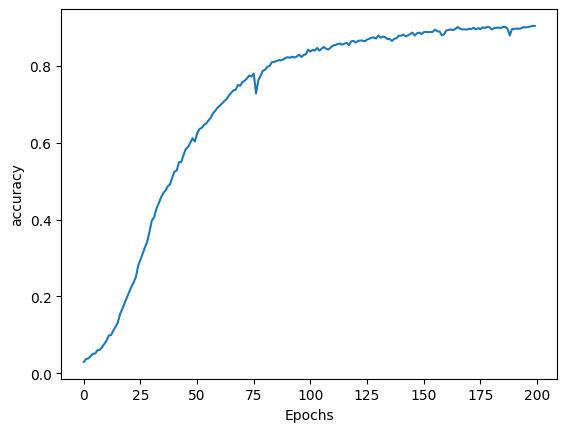

In [11]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.show()

plot_graphs(history, "accuracy")

In [12]:
seed_text = "i like purple"
next_words = 100

for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding="pre")
    predicted = np.argmax(model.predict(token_list), axis=-1)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            ouput_word = word
            break
    seed_text += " " + ouput_word
print(seed_text)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━